# Я-профессионал. Демоверсия отоборочного этапа 2020-2021. Машинное обучение

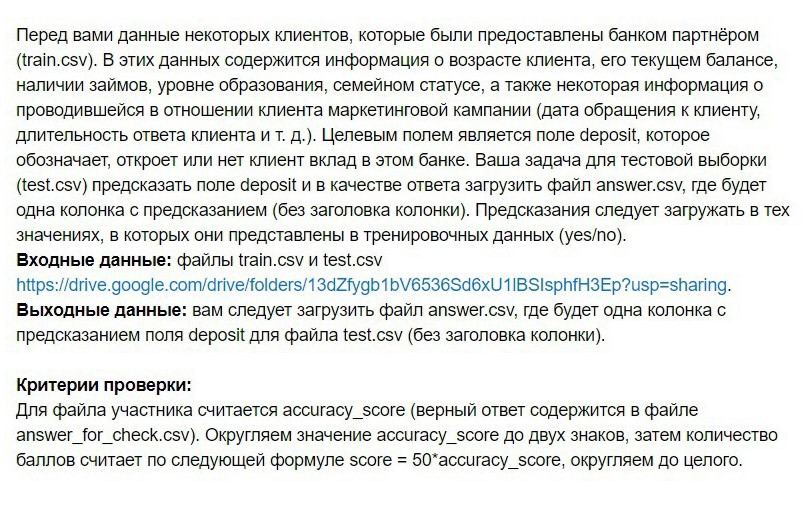

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,57,technician,married,secondary,no,950,yes,no,cellular,9,jul,1272,1,-1,0,unknown,no
1,34,technician,single,tertiary,no,925,yes,no,cellular,13,apr,709,1,-1,0,unknown,yes
2,41,blue-collar,single,secondary,no,75,yes,no,unknown,1,jul,479,9,-1,0,unknown,yes
3,46,technician,single,tertiary,no,4414,no,no,cellular,18,aug,504,7,-1,0,unknown,yes
4,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,47,management,married,tertiary,no,761,yes,no,cellular,11,jul,80,2,-1,0,unknown,no
7809,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7810,35,technician,married,secondary,no,1144,no,no,cellular,20,aug,197,13,-1,0,unknown,no
7811,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown,yes


# Исследование данных

1. Размерность данных
2. Какие типы данных представлены в датасете
3. Есть ли пропуски в данных
4. Сколько классов и какое соотношение в классах

In [ ]:
print("Датасет для тренировки")
print(df_train.shape)
print(df_train.columns)
print('='*100)
print("Датасет для тестирования")
print(df_test.shape)
print(df_test.columns)

Датасет для тренировки
(7813, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
Датасет для тестирования
(3349, 16)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [ ]:
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df_test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7813 non-null   int64 
 1   job        7813 non-null   object
 2   marital    7813 non-null   object
 3   education  7813 non-null   object
 4   default    7813 non-null   object
 5   balance    7813 non-null   int64 
 6   housing    7813 non-null   object
 7   loan       7813 non-null   object
 8   contact    7813 non-null   object
 9   day        7813 non-null   int64 
 10  month      7813 non-null   object
 11  duration   7813 non-null   int64 
 12  campaign   7813 non-null   int64 
 13  pdays      7813 non-null   int64 
 14  previous   7813 non-null   int64 
 15  poutcome   7813 non-null   object
 16  deposit    7813 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


In [ ]:
# deposit - целевая переменная (yes no)
df_train['deposit'].value_counts()

no     4131
yes    3682
Name: deposit, dtype: int64

# Подготовка данных

После того как мы исследовали наши данные, из необходимо подготовить для алгоритмов машинного обучения.

1. Обработать пропуски, если таковые сущетсвуют
2. Сбалансировать классы, если это необходимо
3. Обработать категориальные признаки
4. Создать наборы для обучения и для тестирования
5. Выделить вектор признаков и вектор ответов (целевой переменной)

In [ ]:
df_train.shape

(7813, 17)

In [ ]:
df_train['marital'].value_counts()

married     4431
single      2487
divorced     895
Name: marital, dtype: int64

In [ ]:
df_train['deposit']

0        no
1       yes
2       yes
3       yes
4       yes
       ... 
7808     no
7809    yes
7810     no
7811    yes
7812     no
Name: deposit, Length: 7813, dtype: object

Во-первых, мы видим что целевая переменная - это категориальный признак. Можно конечно использовать CatBoost, который не требует обработки категориальных признаков, но далеко не все алгоритмы на это способны.

In [ ]:
# преобразуем целевую переменную
# создадим словарь
d = {'no': 0, 'yes': 1}

# заменим в колонке deposit значения согласно словарю d с помощью методов map и fillna()
df_train['deposit'] = df_train['deposit'].map(d).fillna(df_train['deposit'])

**map()** — это встроенная функция, которая позволяет обрабатывать и преобразовывать все элементы в итерируемом объекте (в данном случае столбец - это Series) без использования явного цикла for. map() полезен, когда вам нужно применить функцию преобразования к каждому элементу в коллекции или в массиве и преобразовать их в новый массив.

**fillna()** - позволяет заполнить ячейки на необходимое значение

В данном базовом решении, мы не будем рассматривать преобразование категориальных признаков, а возьмем только числовые признаки, отбросив все остальные.

In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,57,technician,married,secondary,no,950,yes,no,cellular,9,jul,1272,1,-1,0,unknown,0
1,34,technician,single,tertiary,no,925,yes,no,cellular,13,apr,709,1,-1,0,unknown,1
2,41,blue-collar,single,secondary,no,75,yes,no,unknown,1,jul,479,9,-1,0,unknown,1
3,46,technician,single,tertiary,no,4414,no,no,cellular,18,aug,504,7,-1,0,unknown,1
4,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,1


Числовые признаки:
- age
- balance
- day
- duration
- campaign
- pdays
- previous

Категориальные признаки:
- job
- marital
- education
- default
- housing
- loan
- contract
- month
- poutcome

In [ ]:
# вектор признаков X и вектор целевой переменной Y

cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = df_train[cols]
X.head()

,age,balance,day,duration,campaign,pdays,previous
0,57,950,9,1272,1,-1,0
1,34,925,13,709,1,-1,0
2,41,75,1,479,9,-1,0
3,46,4414,18,504,7,-1,0
4,28,4465,28,769,1,-1,0


In [ ]:
y = df_train['deposit']
y

0       0
1       1
2       1
3       1
4       1
       ..
7808    0
7809    1
7810    0
7811    1
7812    0
Name: deposit, Length: 7813, dtype: int64

# Подбор лучшей модели

Решая любую задачу машинного обучения необходимо выбрать алгоритм с помощью, которого можно получить наилучший результат.

В данном решении мы будем рассматривать некоторые базовые классификаторы для решения задачи классификации:
1. Дерево решений
2. Логистическая регрессия
3. Метод опорных векторов
4. Метод ближайщих соседей
5. XGBClassifier
6. CatBoost

Вы также можете расширить данный набор классификаторами любыми другими извесными вам.

Для оценки классификаторов мы будем использовать следующие метрики:
1. Confusion matrix
2. Accuracy
3. Recall
4. Precision

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 23 kB/s 


In [ ]:
# подключим необходимые библиотеки

# импортируем необходимые классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# имортируем метрики для оценки классифкаторов
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Создадим модели классификаторов с дефолтным набором гиперпараметров
log = LogisticRegression()
tree = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
xgb = xgb.XGBClassifier()
catboost = CatBoostClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

# df_frain из train.csv - X y 


# разделим тренировчный набор данных на тест и трейн с помощью метода train_test_split()
# test_size - параметр, который показывает в каком соотношении поделить данные
# обычно делят в соотношение test - 30%, train - 70%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print("Общая размерность датасета train:", X.shape)
print("Размерность X_train:", X_train.shape)
print("Размерность X_test:", X_test.shape)

Общая размерность датасета train: (7813, 7)
Размерность X_train: (5469, 7)
Размерность X_test: (2344, 7)


In [ ]:
# Обучение каждой модели и получения

accuracy = []
recall = []
precision = []

models = [log, tree, svc, knn, xgb, catboost]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    accuracy.append(accuracy_score(Y_test, y_pred))
    recall.append(recall_score(Y_test, y_pred))
    precision.append(precision_score(Y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.021282
0:	learn: 0.6832573	total: 48.9ms	remaining: 48.8s
1:	learn: 0.6737906	total: 51.3ms	remaining: 25.6s
2:	learn: 0.6648437	total: 53.6ms	remaining: 17.8s
3:	learn: 0.6561317	total: 56.1ms	remaining: 14s
4:	learn: 0.6474138	total: 58.7ms	remaining: 11.7s
5:	learn: 0.6400616	total: 61.3ms	remaining: 10.2s
6:	learn: 0.6322955	total: 63.9ms	remaining: 9.07s
7:	learn: 0.6252525	total: 66.4ms	remaining: 8.24s
8:	learn: 0.6185276	total: 68.8ms	remaining: 7.58s
9:	learn: 0.6121884	total: 71.4ms	remaining: 7.07s
10:	learn: 0.6054876	total: 74ms	remaining: 6.65s
11:	learn: 0.5994297	total: 76.6ms	remaining: 6.31s
12:	learn: 0.5941007	total: 79.2ms	remaining: 6.01s
13:	learn: 0.5887105	total: 81.8ms	remaining: 5.76s
14:	learn: 0.5833482	total: 84.4ms	remaining: 5.54s
15:	learn: 0.5783111	total: 87ms	remaining: 5.35s
16:	learn: 0.5735887	total: 89.6ms	remaining: 5.18s
17:	learn: 0.5688343	total: 92.2ms	remaining: 5.03s
18:	learn: 0.5641693	total: 94.8ms	remaining: 4.89

In [ ]:
df_score = pd.DataFrame({'models': models, 'accuracy': accuracy, 'recall': recall, 'precision': precision})
df_score

,models,accuracy,recall,precision
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.752133,0.702509,0.758955
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.720990,0.706989,0.706989
2,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.739761,0.628136,0.782366
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.747440,0.731183,0.736462
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.805461,0.790323,0.798913
5,<catboost.core.CatBoostClassifier object at 0x...,0.814420,0.803763,0.805930


По всем параметрам классификатор **CatBoost** показал наилучшее решение.

В дальшейшем для улучшение данного базового решения можно использовать:
- преобразование категориальных переменных
- масштабирование признаков
- кроссвалидацию
- подбор наилучших гиперпараметров для классификаторов

Тестовый датасет обрабатывается как и тренировочный и полученное решение уже загружается в яндекс контест для проверки.